In [6]:
!pip install pandas
!pip install seaborn
!pip install sklearn

     |████████████████████████████████| 6.7MB 99kB/s eta 0:00:011
     |████████████████████████████████| 286kB 49kB/s eta 0:00:011
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=373fced69a7995b5f3057ad85333ee14e6d9835dbdc4e1f8fd52032424443b56
  Stored in directory: /home/mac/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Load Dataset

In [21]:
data = pd.read_csv('breast_cancer_prediction_data.csv')

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Refine Dataset

In [23]:
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

'''
Benign: 양성 (0)
Malignant: 악성 (1)
'''
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


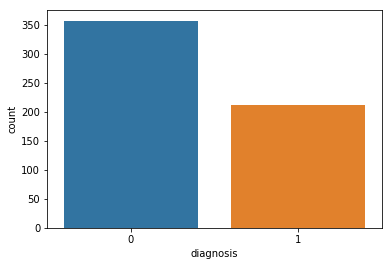

In [6]:
sns.countplot(data['diagnosis'])

# Split Train and Test

In [7]:
train, test = train_test_split(data, test_size=0.2, random_state=2019)

x_train = train.drop(['diagnosis'], axis=1)
y_train = train.diagnosis

x_test = test.drop(['diagnosis'], axis=1)
y_test = test.diagnosis

print(len(train), len(test))

455 114


# SVM

In [8]:
model = svm.SVC(gamma='scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM: 91.23


# DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('DecisionTreeClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

DecisionTreeClassifier: 89.47


# KNeighborsClassifier

In [10]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

KNeighborsClassifier: 92.98


# LogisticRegression

In [11]:
model = LogisticRegression(solver='lbfgs', max_iter=2000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('LogisticRegression: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

LogisticRegression: 93.86


# RandomForestClassifier

In [12]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('RandomForestClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

RandomForestClassifier: 95.61


# Compute Feature Importances

In [13]:
features = pd.Series(
    model.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(features)

radius_worst               0.181351
area_worst                 0.138225
perimeter_worst            0.108732
concave points_worst       0.103579
concave points_mean        0.083415
concavity_mean             0.065126
area_mean                  0.062946
perimeter_mean             0.039917
area_se                    0.029588
concavity_worst            0.025274
radius_mean                0.022904
compactness_worst          0.016634
radius_se                  0.015852
perimeter_se               0.011717
smoothness_worst           0.011164
texture_worst              0.010993
symmetry_worst             0.009364
fractal_dimension_worst    0.008892
texture_mean               0.007594
smoothness_mean            0.006453
texture_se                 0.005352
smoothness_se              0.004881
fractal_dimension_se       0.004499
fractal_dimension_mean     0.004378
symmetry_se                0.004155
compactness_mean           0.003823
compactness_se             0.003694
symmetry_mean              0

# Extract Top 5 Features

In [14]:
top_5_features = features.keys()[:5]

print(top_5_features)

Index(['radius_worst', 'area_worst', 'perimeter_worst', 'concave points_worst',
       'concave points_mean'],
      dtype='object')


# SVM (Top 5)

In [15]:
model = svm.SVC(gamma='scale')
model.fit(x_train[top_5_features], y_train)

y_pred = model.predict(x_test[top_5_features])

print('SVM(Top 5): %.2f' % (metrics.accuracy_score(y_pred, y_test) * 100))

SVM(Top 5): 91.23


# Cross Validaiton (Tedious)

In [16]:
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5, random_state=2019)

accs, scores = [], []

for train_index, test_index in cv.split(data[top_5_features]):
    x_train = data.iloc[train_index][top_5_features]
    y_train = data.iloc[train_index].diagnosis
    
    x_test = data.iloc[test_index][top_5_features]
    y_test = data.iloc[test_index].diagnosis

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    accs.append(metrics.accuracy_score(y_test, y_pred))

print(accs)

[0.7807017543859649, 0.8947368421052632, 0.9736842105263158, 0.9298245614035088, 0.9380530973451328]


# Cross Validation (Simple)

In [17]:
model = svm.SVC(gamma='scale')

cv = KFold(n_splits=5, random_state=2019)

accs = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)

print(accs)

[0.78070175 0.89473684 0.97368421 0.92982456 0.9380531 ]


# Test All Models

In [18]:
models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=2019)

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data.diagnosis, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 90.34%
DecisionTreeClassifier: 91.74%
KNeighborsClassifier: 88.40%
LogisticRegression: 90.69%
RandomForestClassifier: 93.15%


# Normalize Dataset

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[top_5_features])

models = {
    'SVM': svm.SVC(gamma='scale'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', max_iter=2000),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100)
}

cv = KFold(n_splits=5, random_state=2019)

for name, model in models.items():
    scores = cross_val_score(model, scaled_data, data.diagnosis, cv=cv)
    
    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 93.85%
DecisionTreeClassifier: 91.56%
KNeighborsClassifier: 93.15%
LogisticRegression: 93.85%
RandomForestClassifier: 93.33%
